10.27~11.17

In [3]:
# 10.27, Scikit-Learn, 단순선형회귀, Scikit-Learn의 선형회귀
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
X = np.arange(10).reshape(10,1)

In [5]:
X

array([[0],
       [1],
       [2],
       [3],
       [4],
       [5],
       [6],
       [7],
       [8],
       [9]])

In [6]:
y = np.array([-1,2,3,5,4,7,6,6,9,9])

In [7]:
X.shape

(10, 1)

In [8]:
y.shape

(10,)

In [9]:
y

array([-1,  2,  3,  5,  4,  7,  6,  6,  9,  9])

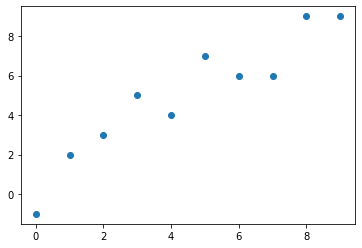

In [10]:
plt.scatter(X,y)

In [11]:
# import 모듈 : 모듈 전체
# from 모듈 import 이름 : 모듈 내에서 필요한 것만 콕 찍어서 가져오는 방법

from sklearn.linear_model import LinearRegression

In [12]:
reg = LinearRegression()
reg.fit(X,y)

LinearRegression()

In [13]:
reg.coef_ # 기울기 : .coef_

array([0.96969697])

In [14]:
reg.intercept_ # 절편 : .intercept_

0.6363636363636358

In [15]:
pred = reg.predict(X) # predict() 메서드에 예측하고 싶은 데이터 배열을 전달하면 데이터 수만큼 예측결과를 리턴

In [16]:
pred 

array([0.63636364, 1.60606061, 2.57575758, 3.54545455, 4.51515152,
       5.48484848, 6.45454545, 7.42424242, 8.39393939, 9.36363636])

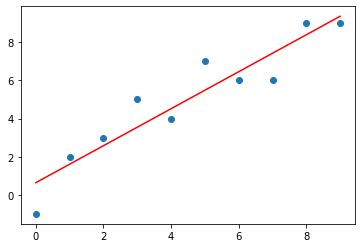

In [17]:
plt.scatter(X,y)
plt.plot(X,pred,color='r') # 안에 파라미터로 그래프 그림

In [18]:
reg2 =LinearRegression(fit_intercept=False) 
# 절편 없음 : 원점을 지나는 회귀, fit_intercept 인수는 모형에 상수항이 있는가 없는가를 결정하는 함수

In [19]:
reg2.fit(X,y)

LinearRegression(fit_intercept=False)

In [20]:
pred2=reg2.predict(X)

In [21]:
reg2.coef_

array([1.07017544])

In [22]:
reg2.intercept_

0.0

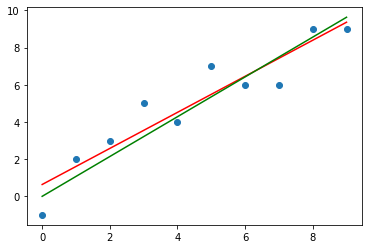

In [23]:
plt.scatter(X,y)
plt.plot(X,pred,color='r')
plt.plot(X,pred2,color='g')

In [24]:
reg.score(X,y) # 결정 계수 (R^2) : 1에 가까울수록 좋다

0.8815426997245179

In [25]:
reg2.score(X,y)

0.8682216905901117

In [26]:
# 11.1 ~ 11.3, 지도학습, 분류(classification), 불꽃(iris) 데이터, 로지스틱 회귀를 사용한 분류

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [28]:
path = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
df = pd.read_csv(path, header=None) # header : 열 이름(헤더)으로 사용할 행 지정 / 첫 행이 헤더가 아닌 경우 header = None 

In [29]:
df.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [30]:
df.columns =  ['sepal length', 'sepal width', 'petal length', 'petal width', 'species'] # 각각의 특성(feature) 대입
df.head()

,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [31]:
df.tail()

,sepal length,sepal width,petal length,petal width,species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [32]:
X = df.drop('species', axis=1).to_numpy() # axis=0 행 방향, axis = 1 열 방향, .to_numpy : pandas 객체를 numpy 배열 객체인 ndarray로 반환 
y = df['species'].to_numpy() # Series에서 ndarray 필요한 상황일 때 to_numpy() 사용
y = np.where(y == 'Iris-setosa', 0, np.where(y == 'Iris-versicolor', 1, 2)) # np.where(condition, T, F) 값 변경

y2 = df['species'].to_numpy() # 내가 테스트 해본거 그냥, 종류가 3개인가? 해서, tail(80) 해서 보니까 종류 3개 맞네
y2 = np.where(y2 == 'Iris-versicolor', 1,2) # 내가 테스트 해본거 그냥,

In [33]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [34]:
y2 # 그냥 내가 테스트한거

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [35]:
X = X[:, [2, 3]] # petal length, petal width 2개 사용하겠다는 소리

In [36]:
X.shape # df.shape : (행, 열) 순서로 출력

(150, 2)

In [37]:
y.shape

(150,)

### stratify : default=None 입니다. classification을 다룰 때 매우 중요한 옵션값입니다. stratify 값을 target으로 지정해주면 각각의 class 비율(ratio)을 train / validation에 유지해 줍니다. (한 쪽에 쏠려서 분배되는 것을 방지합니다) 만약 이 옵션을 지정해 주지 않고 classification 문제를 다룬다면, 성능의 차이가 많이 날 수 있습니다.

In [38]:
# 데이터의 분할 : 훈련용 vs 테스트용
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=1, stratify=y) # train_size : 학습 데이터의 비율, stratify : 지정한 Data의 비율을 유지한다. 
pd.Series(y_train).value_counts() # value_counts()는 어떤 컬럼/Series의 unique value들을 count
# Series 정의할 때, pd.Series()함수 이용, index와 values 동시 확인, 이런걸 계층 샘플링 이라고 말함.
# 이거 훈련 세트 사이즈 지정한대로 잘 나눠졌는지 확인하려고 한 느낌인데, y_train은 되고 X_train은 왜 안될까?
# 강의 확인 : y_train의 비율을 알고싶어서 한거

0    35
1    35
2    35
dtype: int64

In [39]:
pd.Series(y_test).value_counts()

0    15
1    15
2    15
dtype: int64

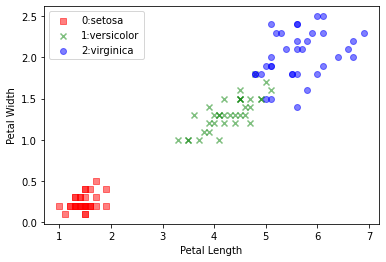

In [40]:
# 데이터 시각화, x 축 : 꽃잎의 길이, y 축 : 꽃잎의 너비, 각 점의 색깔을 품종마다 다르게 표시, 훈련용 데이터
ax = plt.axes() # Axes : 보통 plot으로 생각하는 하나의 그래프
markers = ['s','x','o']
colors = ['r','g','b']
labels = ['0:setosa', '1:versicolor', '2:virginica']
for i in range(3):
    X_sub = X_train[y_train == i] # 열 단위로 마스킹, X_train에서 y_train이 i인 애들 뽑겠다는 소리
    ax.scatter(X_sub[:,0], X_sub[:,1], alpha=0.5, marker = markers[i], c=colors[i], label = labels[i])
    ax.set(xlabel='Petal Length', ylabel = 'Petal Width')
    ax.legend()

In [41]:
# 데이터 표준화 : 특성별로 데이터의 스케일이 다르다면, 머신러닝이 잘 동작하지 않을 수 있다. 
# 그래서 데이터 스케일링 작업을 통해, 모든 특성의 범위(또는 분포)를 같게 만들어줘야합니다.
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train) # 각 열별 평균과 표준 편차를 일단 계산만 해준다.

StandardScaler()

In [42]:
X_train_std = sc.transform(X_train) # 이 값들을 이용해서 여기서 변환을 해준다.
X_test_std = sc.transform(X_test)

In [43]:
# 로지스틱 회귀
from sklearn.linear_model import LogisticRegression

logistic = LogisticRegression()
logistic.fit(X_train_std, y_train) # y_train은 만들지도 않고, 원래 표준화 하는거 아님

LogisticRegression()

In [44]:
logistic.predict(X_train_std[:3,:]) #  [:,:] 쓰면 105개 3:1 비율로 잘 나눠짐, 여기서는 그냥 3개만 본거임

array([0, 0, 2])

In [45]:
y_train[:3]

array([0, 0, 2])

In [46]:
logistic.predict_proba(X_train_std[:3,:]) # predict_proba()클래스 확률을 예측하는 데 사용
                                          # predict()실제 클래스를 예측하는 데 사용

array([[9.59543959e-01, 4.04522758e-02, 3.76537919e-06],
       [9.40769396e-01, 5.92226306e-02, 7.97320867e-06],
       [6.25773725e-05, 6.67508339e-02, 9.33186589e-01]])

In [47]:
logistic.score(X_train_std, y_train)  # 정확도(accuracy) = 정분류율

0.9428571428571428

In [48]:
logistic.score(X_test_std, y_test) # 이정도 차이는 ㅇㅋ

0.9777777777777777

In [49]:
from sklearn.metrics import confusion_matrix # 이진 분류 정오분류표(confusion matrix)

In [50]:
# 과소 과대 적합을 지나고 나면 test 데이터에 대한 confusion_matrix를 할거임

y_pred = logistic.predict(X_test_std) # 테스트 데이터에 대한 예측 값

confusion_matrix(y_test,y_pred)

# confusion_matrix(실제값, 예측값)

array([[15,  0,  0],
       [ 0, 15,  0],
       [ 0,  1, 14]], dtype=int64)

In [51]:
# 11.8 SVM

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [53]:
# iris 데이터 준비
path='https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
df=pd.read_csv(path,header=None)

df.columns =  ['sepal length', 'sepal width', 'petal length', 'petal width', 'species']

X=df.drop(['species'],axis=1).to_numpy()
y=df['species'].to_numpy()
y=np.where(y=='Iris-setosa',0,np.where(y=='Iris-versicolor',1,2)) #if-else랑 비슷한거로 봐도되나?

X=X[:,[2,3]]

In [54]:
# 데이터 분할
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7,random_state=1,stratify=y)

In [55]:
# 표준화
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [56]:
# 서포트벡터머신
from sklearn.svm import SVC

svc_linear=SVC(kernel="linear",C=1.0,random_state=1) # 선형 분류 (선형 SVM (kernel='linear' 옵션))
# 데이터 (서포트 벡터:선으로 부터 가장 가까이 있는 데이터)로 부터 여백 (margin)이 최대인 선 (2차원에서는 선, 3차원에서는 면)을 찾아 분류

In [57]:
svc_linear.fit(X_train_std,y_train)

SVC(kernel='linear', random_state=1)

In [58]:
svc_linear.score(X_train_std,y_train)

0.9523809523809523

In [59]:
svc_linear.score(X_test_std,y_test)

0.9777777777777777

In [60]:
svc_linear2=SVC(kernel="rbf",C=1.0,random_state=1) # 비선형 분류
# : 선형 분류가 않되는 것도 상위 차원으로 가면 선형 분류 가능 (다항식 SVM (kernel='poly' 옵션) 과 RBF SVM(kernel='rbf' 옵션))
svc_linear2.fit(X_train_std,y_train)

print(svc_linear2.score(X_train_std,y_train))
print(svc_linear2.score(X_test_std,y_test))

0.9619047619047619
0.9777777777777777


In [61]:
# 11.15 결정 트리
# 자주 하는거는 그냥 대충 설명없이 올림 이제, 감잡음 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

path='https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
df=pd.read_csv(path,header=None)
df.columns =  ['sepal length', 'sepal width', 'petal length', 'petal width', 'species']
X=df.drop(['species'],axis=1).to_numpy()
y=df['species'].to_numpy()
y=np.where(y=='Iris-setosa',0,np.where(y=='Iris-versicolor',1,2)) #if-else와 비슷한 문법
X=X[:,[2,3]]

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7,random_state=1,stratify=y)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [62]:
# 의사결정트리
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

tree=DecisionTreeClassifier(random_state=1); #default 인수
# DecisionTreeClassifier?

In [63]:
tree.fit(X_train,y_train) # 결정 트리는 표준화를 해도되지만 구지 표준화 할 필요가 없다,

DecisionTreeClassifier(random_state=1)

In [64]:
tree.score(X_train,y_train)

0.9904761904761905

[Text(111.6, 403.81714285714287, 'X[1] <= 0.75\ngini = 0.667\nsamples = 105\nvalue = [35, 35, 35]'),
 Text(55.8, 341.69142857142856, 'gini = 0.0\nsamples = 35\nvalue = [35, 0, 0]'),
 Text(167.39999999999998, 341.69142857142856, 'X[0] <= 4.75\ngini = 0.5\nsamples = 70\nvalue = [0, 35, 35]'),
 Text(111.6, 279.5657142857143, 'gini = 0.0\nsamples = 30\nvalue = [0, 30, 0]'),
 Text(223.2, 279.5657142857143, 'X[1] <= 1.75\ngini = 0.219\nsamples = 40\nvalue = [0, 5, 35]'),
 Text(111.6, 217.44, 'X[0] <= 4.95\ngini = 0.5\nsamples = 8\nvalue = [0, 4, 4]'),
 Text(55.8, 155.3142857142857, 'gini = 0.0\nsamples = 2\nvalue = [0, 2, 0]'),
 Text(167.39999999999998, 155.3142857142857, 'X[1] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(111.6, 93.18857142857144, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(223.2, 93.18857142857144, 'X[0] <= 5.45\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(167.39999999999998, 31.062857142857126, 'gini = 0.0\nsamples = 2\nvalue = [0, 2, 0

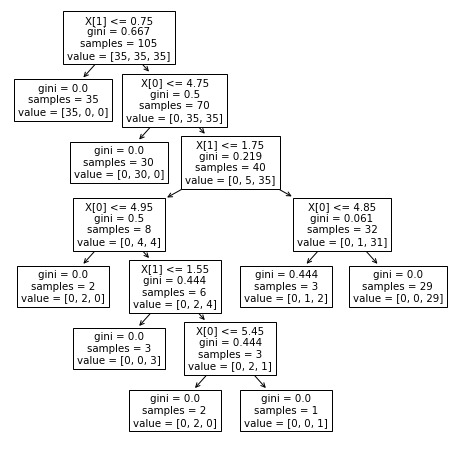

In [65]:
plt.figure(figsize=(8,8))
plot_tree(tree)

In [66]:
tree.get_depth()

6

In [67]:
tree.get_n_leaves() # leaf node, 잎 노드

8

In [68]:
# 최대 깊이 설정
tree4=DecisionTreeClassifier(max_depth=4,random_state=1) # 깊이 4로 제한

tree4.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=1)

In [69]:
tree4.score(X_train, y_train)

0.9714285714285714

In [70]:
tree4.score(X_test,y_test) #최대 길이 설정 이후에 별 차이가 없다면 심플이 좋다.

0.9777777777777777

In [71]:
tree2=DecisionTreeClassifier(max_depth=2,random_state=1) # 깊이 2로 제한

tree2.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=2, random_state=1)

In [72]:
tree2.score(X_train,y_train)

0.9523809523809523

In [73]:
tree2.score(X_test,y_test)

0.9555555555555556

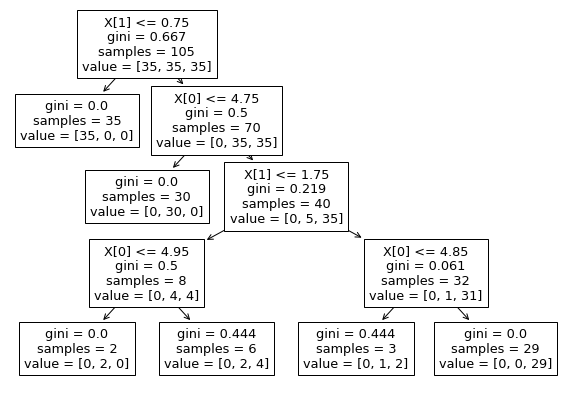

In [74]:
plt.figure(figsize=(10,7))
plot_tree(tree4);

In [75]:
tree2.predict([[6.0,2.5]]) 

array([2])

In [76]:
tree2.feature_importances_ # 2개의 특징 중에 어떤게 더 중요한가?, X1이 더 큼, 꽃잎의 너비가 더 중요한 변수임

array([0.42857143, 0.57142857])

In [77]:
# 11.15 데이터 전처리
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.DataFrame([ ['green', 'L', 10.1, 'yes'], ['green', 'M', 13.5, 'no'], ['red', 'XL', 15.3, 'yes'], ['blue', 'S', 12.7, 'yes']
])
df.columns = ['color', 'size', 'price', 'label']

In [78]:
df

,color,size,price,label
0,green,L,10.1,yes
1,green,M,13.5,no
2,red,XL,15.3,yes
3,blue,S,12.7,yes


In [79]:
X= df.drop('label',axis=1)

In [80]:
y=df['label'] # pandas Series 객체

In [81]:
y1=np.where(y=='no',0,1)

In [82]:
y1

array([1, 0, 1, 1])

In [83]:
d={'no':0,'yes':1} # 딕셔너리 만들어 놓고
y2=y.map(d) # y는 시리즈, map에다가 d 넣어주면 아래와 같음.

"""
시리즈.map(내장함수 or 사용자 정의함수 or 딕셔너리 등) 
map은 Pandas Series(column)에 사용할 수 있는 함수로
Series의 각 원소에 연산을 적용
각 원소를 입력으로 받아, 단일 값을 반환 """ 

'\n시리즈.map(내장함수 or 사용자 정의함수 or 딕셔너리 등) \nmap은 Pandas Series(column)에 사용할 수 있는 함수로\nSeries의 각 원소에 연산을 적용\n각 원소를 입력으로 받아, 단일 값을 반환 '

In [84]:
y2

0    1
1    0
2    1
3    1
Name: label, dtype: int64

In [85]:
y2=y.map(d).to_numpy()

In [86]:
y2

array([1, 0, 1, 1], dtype=int64)

In [87]:
from sklearn.preprocessing import LabelEncoder

encoder=LabelEncoder()

In [88]:
encoder.fit(y)

LabelEncoder()

In [90]:
encoder.classes_

array(['no', 'yes'], dtype=object)

In [91]:
y3=encoder.transform(y)

In [92]:
y3

array([1, 0, 1, 1])

In [93]:
y4=LabelEncoder().fit_transform(y)

In [94]:
y4

array([1, 0, 1, 1])

In [101]:
X['size']

0     L
1     M
2    XL
3     S
Name: size, dtype: object

In [102]:
size_mapping={'XS':0,'S':1,'M':2,'L':3,'XL':4,'XXL':5}
X['size2']=X['size'].map(size_mapping)

In [103]:
X=X.drop('size',axis=1)

In [104]:
X

,color,price,size2
0,green,10.1,3
1,green,13.5,2
2,red,15.3,4
3,blue,12.7,1


In [105]:
#원핫인코딩
X=pd.get_dummies(X)

"""
기본적으로 사이킷런의 머신러닝 알고리즘은 문자열 값을 입력 값으로 허락하지 않는다.
그렇기 때문에 모든 문자열 값들을 숫자 형으로 인코딩하는 전처리 작업 후에 머신러닝 모델에 학습을 시켜야한다.
원-핫 인코딩 
간단하게 피처 값의 유형에 따라 새로운 피처를 추가해 고유 값에 해당하는 칼럼에만 1을 표시하고 나머지 칼럼에는 0을 표시하는 방법
"""

'\n기본적으로 사이킷런의 머신러닝 알고리즘은 문자열 값을 입력 값으로 허락하지 않는다.\n그렇기 때문에 모든 문자열 값들을 숫자 형으로 인코딩하는 전처리 작업 후에 머신러닝 모델에 학습을 시켜야한다.\n원-핫 인코딩 \n간단하게 피처 값의 유형에 따라 새로운 피처를 추가해 고유 값에 해당하는 칼럼에만 1을 표시하고 나머지 칼럼에는 0을 표시하는 방법\n'

In [107]:
X

,price,size2,color_blue,color_green,color_red
0,10.1,3,0,1,0
1,13.5,2,0,1,0
2,15.3,4,0,0,1
3,12.7,1,1,0,0


In [108]:
# 와인데이터
path='https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data'
wine=pd.read_csv(path,header=None)
wine

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [109]:
X=wine.iloc[:,1:].to_numpy()

In [110]:
X

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [111]:
y=wine.iloc[:,0].values

In [112]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3], dtype=int64)

In [113]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7,random_state=0,stratify=y)

In [117]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
X_train_std=scaler.fit_transform(X_train)
X_test_std=scaler.transform(X_test)

In [116]:
pd.DataFrame(X_train_std).describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,1.240000e+02,1.240000e+02,1.240000e+02,1.240000e+02,1.240000e+02,1.240000e+02,1.240000e+02,1.240000e+02,1.240000e+02,1.240000e+02,1.240000e+02,1.240000e+02,1.240000e+02
mean,6.890098e-15,1.683241e-16,3.799660e-15,2.856138e-16,-3.178461e-16,1.662649e-15,1.598184e-16,-1.198862e-15,1.888274e-15,-1.615195e-15,-5.783904e-16,8.631089e-16,-1.334058e-16
std,1.004057e+00,1.004057e+00,1.004057e+00,1.004057e+00,1.004057e+00,1.004057e+00,1.004057e+00,1.004057e+00,1.004057e+00,1.004057e+00,1.004057e+00,1.004057e+00,1.004057e+00
min,-1.971837e+00,-1.380243e+00,-2.554934e+00,-2.525252e+00,-2.069521e+00,-2.187238e+00,-1.691226e+00,-1.964528e+00,-2.068907e+00,-1.419256e+00,-2.147813e+00,-1.947267e+00,-1.465378e+00
25%,-8.150037e-01,-6.275963e-01,-5.499141e-01,-6.917901e-01,-7.889079e-01,-8.535947e-01,-7.985839e-01,-8.092365e-01,-6.496852e-01,-8.006399e-01,-7.436984e-01,-8.974047e-01,-7.823560e-01
50%,3.819870e-02,-4.351583e-01,-5.565323e-02,-9.065504e-02,-1.130290e-01,1.385058e-01,9.896271e-02,-2.315907e-01,-7.775997e-02,-1.438903e-01,4.894675e-02,2.823374e-01,-2.499217e-01
75%,8.033481e-01,6.980880e-01,7.370293e-01,5.705935e-01,5.094911e-01,8.297234e-01,8.322044e-01,6.142478e-01,5.619490e-01,4.704883e-01,7.510038e-01,7.946413e-01,8.610452e-01
max,2.181832e+00,2.947475e+00,3.152379e+00,3.065304e+00,3.693237e+00,2.529306e+00,2.958360e+00,2.161513e+00,3.286008e+00,3.351712e+00,2.109824e+00,1.992422e+00,2.843268e+00


In [118]:
pd.DataFrame(X_test_std).describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000
mean,-0.131835,-0.049174,-0.226279,-0.303835,0.153107,-0.159365,-0.112663,-0.168936,-0.279228,-0.044005,0.048611,-0.036483,-0.080326
std,0.945881,0.841129,1.059069,0.979626,1.044970,1.049986,0.925997,1.078199,0.864142,0.938784,1.112748,1.079511,0.885251
min,-2.433355,-1.243398,-3.823226,-2.765706,-1.286924,-1.992071,-1.563706,-1.634445,-2.085853,-1.614162,-1.876049,-1.918405,-1.351669
25%,-0.815004,-0.642564,-0.689799,-1.112585,-0.717763,-1.016234,-0.928557,-0.953648,-0.844563,-0.777336,-0.788992,-1.139126,-0.767758
50%,-0.156125,-0.400947,-0.260818,-0.316081,-0.077456,-0.178641,-0.004034,-0.602934,-0.306530,-0.207447,0.139535,0.195751,-0.260678
75%,0.566516,0.569796,0.457259,0.472909,0.829644,0.508511,0.662995,0.511097,0.269632,0.491674,0.784974,0.946168,0.396222
max,1.647442,1.929691,1.995996,2.163601,4.475833,2.480514,1.653729,2.409076,2.777630,2.368706,3.423350,1.876974,2.228625


In [127]:
from sklearn.decomposition import PCA

pca=PCA(n_components=2)
pca.fit(X_train_std) # PCA 역시 표준화된 버전을 더 좋아한다.

PCA(n_components=2)

In [129]:
X_train_pca=pca.transform(X_train_std) # PCA로 변환된 값 사용하겠다.
X_train_std.shape

(124, 13)

In [130]:
X_train_std.shape

(124, 13)

In [131]:
pca.components_

array([[-0.13724218,  0.24724326, -0.02545159,  0.20694508, -0.15436582,
        -0.39376952, -0.41735106,  0.30572896, -0.30668347,  0.07554066,
        -0.32613263, -0.36861022, -0.29669651],
       [ 0.50303478,  0.16487119,  0.24456476, -0.11352904,  0.28974518,
         0.05080104, -0.02287338,  0.09048885,  0.00835233,  0.54977581,
        -0.20716433, -0.24902536,  0.38022942]])

In [126]:
pca.explained_variance_ratio_  #주성분 1개를 뽑아도 37프로를 설명된다. 다음걸 뽑으면 18프로 뽑음, 주성분 2개쓰면 왠만큼 설명된다.

array([0.36951469, 0.18434927])

In [89]:
# 11.17 모델튜닝